
# <font color="#1d479b">Sommaire</font>
   
1. [Predictions](#section_2)     
    1.1. [Linear Regression](#section_2_1)
    
    1.2. [Ridge Regression](#section_2_2)
    
    1.3. [SDG Regression](#section_2_3)
    
    1.4. [Random Forest](#section_2_4)
    
    1.5. [Choix hyperparametres](#section_2_5) 
    
    1.6. [Feature Importantce](#section_2_6)   
 

In [22]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

In [23]:
data = pd.read_csv("data_seattle.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head();

In [24]:
data['Log10_SiteEnergyUse'] = np.log10(data['SiteEnergyUse'])
data.drop(columns=['SiteEnergyUse'], axis=1, inplace=True)

In [25]:
data.head();

# 1. DATASET WITHOUT ENERGYSTARScore

In [26]:
# DATASET WITH ENERGYSTARScore 
df_No_ENSTScore = data.drop(columns=["ENERGYSTARScore"])

In [27]:
df_No_ENSTScore.head();

In [28]:
# Definition of target and features variables

targets = ['Log10_SiteEnergyUse', 'TotalGHGEmissions']

target1 = ['Log10_SiteEnergyUse']
target2 = ['TotalGHGEmissions']

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

In [29]:
print(X.shape)
print(y.shape)

(995, 64)
(995, 1)


# SKLEARN DummyRegressor

In [9]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define your input features (X) and target (y)
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Fit the dummy regressor to your data
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)

# Predict using the fitted dummy regressor
y_pred = dummy.predict(X)

# Calculate MSE, MAE, and R-Squared metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 0.31665404079719073
RMSE: 0.5627202153798908
MAE: 0.45387052503772274
R2: 0.0


## 1.1. Linear Regression

- ### Best hyperparameters

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into features and target

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Define the model
model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'fit_intercept': True, 'normalize': False}


- ### Linear Regression

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Definition of target and features variables

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# create a LinearRegression object with hyperparameters
lr = LinearRegression(fit_intercept=True, normalize=False)

# Fit a linear regression model
reg = lr.fit(X, y)

# Make predictions
y_pred = reg.predict(X)

# Calculate RMSE, MSE, MAE, and R2
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")


RMSE: 0.30
MSE: 0.09
MAE: 0.23
R2: 0.71


## 1.2 Ridge Regression

- ### Best hyperparameters

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset

# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Define the model
model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 1.0, 'fit_intercept': False, 'normalize': True, 'solver': 'svd'}


- ### Ridge Regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(alpha=0.1, fit_intercept= False, normalize= True, solver= 'svd')
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, 
                             cv=5, 
                             scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.3753873711659685
MSE: 0.1416483598509865
MAE: 0.23371130391812325
R^2: 0.7101244840876304


## 1.2. SGDRegression

- ### Best hyperparameters

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Split the dataset into features and target

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Define the model
model = SGDRegressor()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0.15, 0.25, 0.5, 0.75],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'fit_intercept': [True, False],
              'max_iter': [1000, 2000, 3000],
              'tol': [1e-3, 1e-4, 1e-5]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'alpha': 0.0001, 'fit_intercept': False, 'l1_ratio': 0.25, 'max_iter': 2000, 'penalty': 'l1', 'tol': 1e-05}


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a linear regression model using Stochastic Gradient Descent (SGD)
reg = SGDRegressor(alpha=0.0001, fit_intercept=False, l1_ratio=0.25, 
                   max_iter=2000, penalty='l1', tol=1e-05)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.4013592382925554
MSE: 0.16339521876317475
MAE: 0.2523776164941764
R^2: 0.6506969147457466


## 1.3. Random Forest

- ### Best hyperparameters

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


KeyboardInterrupt: 

- ### Random Forest

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables

targets = ['Log10_SiteEnergyUse', 'TotalGHGEmissions']
target1 = ['Log10_SiteEnergyUse']
target2 = ['TotalGHGEmissions']

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Random Forest regression model
reg = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators=150)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.29587917505016265
MSE: 0.08781091499819224
MAE: 0.12191212690811536
R^2: 0.9192194624964538


- ### Meilleur modèle sans Energy Star Score

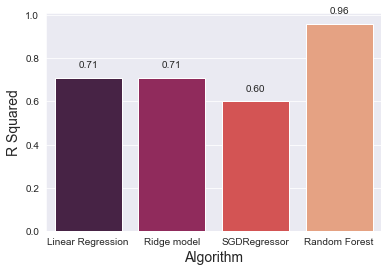

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "Rsquared": [0.71, 0.71, 0.60, 0.96]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="Rsquared", data=df, palette="rocket")


# Add the values on top of the bars
for i, value in enumerate(df["Rsquared"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Set the x and y labels
plt.xlabel("Algorithm", fontsize=14)
plt.ylabel("R Squared", fontsize=14)

# Show the plot
plt.show()

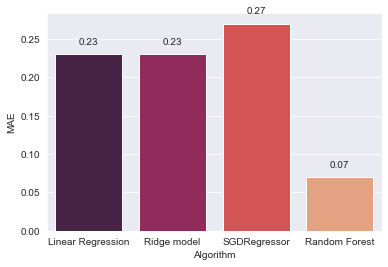

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "MAE":[0.23, 0.23, 0.27, 0.07]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="MAE", data=df, palette="rocket")


# Add the values on top of the bars
for i, value in enumerate(df["MAE"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Show the plot
plt.show()

## Feature Importance sans Energy Star Score

Les variables ci-dessous comptent pour plus de 80% de la prévision :
- GFAPerBuilding: 0.6759
- GFAPerFloor: 0.0454
- YearBuilt: 0.0329
- PrimaryPropertyType_Warehouse: 0.0318
- PrimaryPropertyType_Supermarket / Grocery Store: 0.0269

In [10]:
from sklearn.ensemble import RandomForestRegressor


# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target1]

# Define the model
model = RandomForestRegressor()

# Train the model on the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Get the column names
feature_names = X.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature importances and column names in descending order
for i in indices:
    print("{}: {:.4f}".format(feature_names[i], importances[i]));

GFAPerBuilding: 0.6715
GFAPerFloor: 0.0449
YearBuilt: 0.0336
PrimaryPropertyType_Warehouse: 0.0281
PrimaryPropertyType_Supermarket / Grocery Store: 0.0280
LargestPropertyUseType_Supermarket/Grocery Store: 0.0240
PrimaryPropertyType_Hospital: 0.0186
LargestPropertyUseType_Hospital (General Medical & Surgical): 0.0174
ZipCode: 0.0166
LargestPropertyUseType_Non-Refrigerated Warehouse: 0.0157
GFABuildingRate: 0.0082
LargestPropertyUseType_Data Center: 0.0079
LargestPropertyUseType_Distribution Center: 0.0054
PrimaryPropertyType_Distribution Center: 0.0049
Address_Street: 0.0044
Address_Avenue: 0.0041
Neighborhood_Greater Duwamish: 0.0040
BuildingType_Campus: 0.0039
Address_Way: 0.0032
Neighborhood_East: 0.0030
Neighborhood_Delridge: 0.0029
PrimaryPropertyType_Worship Facility: 0.0027
Neighborhood_Northwest: 0.0026
Neighborhood_Ballard: 0.0025
BuildingType_NonResidential: 0.0025
LargestPropertyUseType_Senior Care Community: 0.0024
LargestPropertyUseType_Parking: 0.0021
LargestPropertyUseTyp

In [11]:
indice_df = pd.DataFrame(indices)

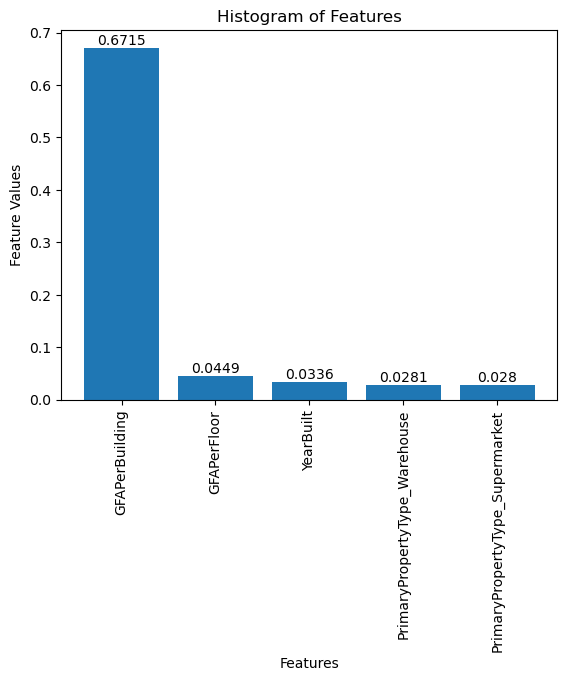

In [19]:
import matplotlib.pyplot as plt

# Feature names and values
feature_names = ["GFAPerBuilding", "GFAPerFloor", "YearBuilt", "PrimaryPropertyType_Warehouse", "PrimaryPropertyType_Supermarket"]
feature_values = [0.6715, 0.0449, 0.0336, 0.0281, 0.0280]

# Plot the histogram
plt.bar(feature_names, feature_values)
plt.title("Histogram of Features")
plt.xlabel("Features")
plt.ylabel("Feature Values")

plt.xticks(rotation=90)
# Add numbers on top of each feature bar
for i, val in enumerate(feature_values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom')

# Display the plot
plt.show()



# 2. DATASET WITH ENERGYSTARScore

In [30]:
df_with_ENSTScore = data.copy()
df_with_ENSTScore.head()

,ZipCode,YearBuilt,ENERGYSTARScore,TotalGHGEmissions,GFAPerBuilding,GFAPerFloor,GFABuildingRate,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Address_Avenue,Address_Others,Address_Street,Address_Way,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater Duwamish,Neighborhood_Lake Union,Neighborhood_Magnolia / Queen Anne,Neighborhood_North,Neighborhood_Northeast,Neighborhood_Northwest,Neighborhood_Southeast,Neighborhood_Southwest,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,Log10_SiteEnergyUse
0,98101.0,1927,60.0,249.98,88434.0,7369.500,1.00000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.858920
1,98101.0,1996,61.0,295.86,103566.0,9415.091,0.85455,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.923655
2,98101.0,1969,43.0,2089.28,956110.0,23319.756,0.79425,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.860859
3,98101.0,1926,56.0,286.43,61320.0,6132.000,1.00000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.832163
4,98121.0,1980,75.0,505.01,175580.0,9754.444,0.64688,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.151450


In [31]:
# Definition of target and features variables

targets = ['Log10_SiteEnergyUse', 'TotalGHGEmissions']

target1 = ['Log10_SiteEnergyUse']
target2 = ['TotalGHGEmissions']

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# SKLEARN DummyRegressor

In [7]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define your input features (X) and target (y)
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Fit the dummy regressor to your data
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)

# Predict using the fitted dummy regressor
y_pred = dummy.predict(X)

# Calculate MSE, MAE, and R-Squared metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 0.31665404079719073
RMSE: 0.5627202153798908
MAE: 0.45387052503772274
R2: 0.0


## 2.1. Linear Regression

- ### Best hyperparameters

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'fit_intercept': True, 'normalize': False}


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Definition of target and features variables


X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]


# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# create a LinearRegression object with hyperparameters
lr = LinearRegression(fit_intercept=True, normalize=False)

# Fit a linear regression model
reg = lr.fit(X, y)

# Make predictions
y_pred = reg.predict(X)


# Calculate RMSE, MSE, MAE, and R2
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 0.27
MSE: 0.07
MAE: 0.20
R2: 0.78


## 2.2. Ridge Regression

- ### Best hyperparameters

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset

# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 1.0, 'fit_intercept': False, 'normalize': True, 'solver': 'auto'}


- ### Ridge Regression

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]


# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(alpha=0.1, fit_intercept=False, normalize=True, solver = 'auto')
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.33770758180862326
MSE: 0.11543697749976492
MAE: 0.2054101877393658
R^2: 0.7759244811469856


## 2.2. SGDRegression

- ### Best hyperparameters

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Split the dataset into features and target

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = SGDRegressor()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0.15, 0.25, 0.5, 0.75],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'fit_intercept': [True, False],
              'max_iter': [1000, 2000, 3000],
              'tol': [1e-3, 1e-4, 1e-5]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 3000, 'penalty': 'l1', 'tol': 0.0001}


- ### SGD Regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a linear regression model using Stochastic Gradient Descent (SGD)
reg = SGDRegressor(alpha=0.0001, fit_intercept=True, l1_ratio=0.5, max_iter=3000, penalty='l1', tol=0.0001)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.319020607118546
MSE: 0.10386744147067965
MAE: 0.21449554786898417
R^2: 0.7481205976776715


## 2.3. Random Forest

- ### Best hyperparameters

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


- ### Random Forest

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Definition of target and features variables


X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]


# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Random Forest regression model
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.25057157111296363
MSE: 0.06317570644447537
MAE: 0.059434558605251424
R^2: 0.9745244245278099


# The best model is RadomForest
- **Smaller RMSE, MSE, MAE and higher R squared.**

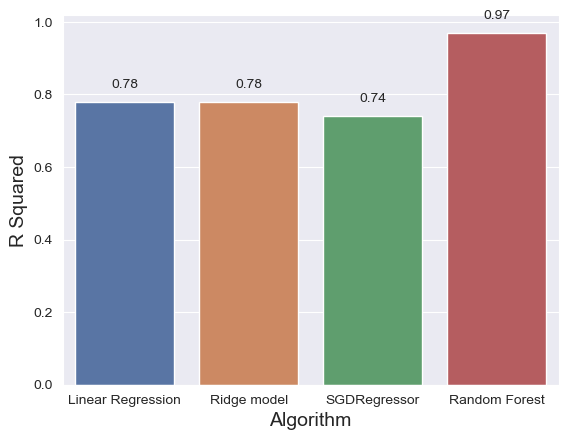

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "Rsquared": [0.78, 0.78, 0.74, 0.97]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="Rsquared", data=df, palette="deep")


# Add the values on top of the bars
for i, value in enumerate(df["Rsquared"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Set the x and y labels
plt.xlabel("Algorithm", fontsize=14)
plt.ylabel("R Squared", fontsize=14)

# Show the plot
plt.show()

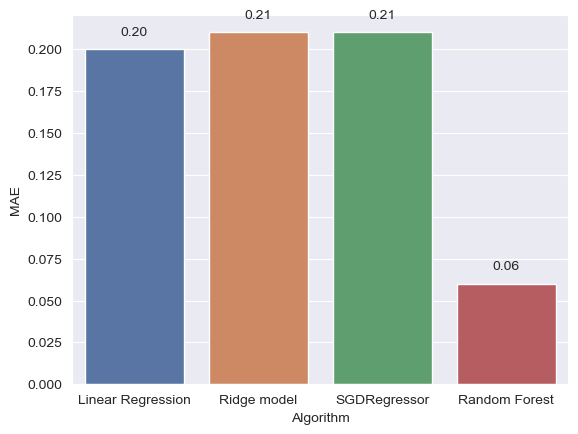

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "MAE":[0.20, 0.21, 0.21, 0.06]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="MAE", data=df, palette="deep")


# Add the values on top of the bars
for i, value in enumerate(df["MAE"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Show the plot
plt.show()

### Feature Importance
82% de la prédiction
- GFAPerBuilding: 0.6558
- ENERGYSTARScore: 0.0945
- PrimaryPropertyType_Warehouse: 0.0312
- GFAPerFloor: 0.0276
- LargestPropertyUseType_Supermarket/Grocery Store: 0.0231

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]
# Define the model
model = RandomForestRegressor(n_estimators=100)
# Train the model on the data
model.fit(X, y)
# Get the feature importances
importances = model.feature_importances_
# Get the column names
feature_names = X.columns
# Sort the feature importances in descending order
indices = importances.argsort()[::-1]
# Print the feature importances and column names in descending order
for i in indices:
    print("{}: {:.4f}".format(feature_names[i], importances[i]));

GFAPerBuilding: 0.6600
ENERGYSTARScore: 0.0927
PrimaryPropertyType_Warehouse: 0.0274
GFAPerFloor: 0.0260
PrimaryPropertyType_Supermarket / Grocery Store: 0.0240
LargestPropertyUseType_Supermarket/Grocery Store: 0.0227
PrimaryPropertyType_Hospital: 0.0181
LargestPropertyUseType_Hospital (General Medical & Surgical): 0.0176
LargestPropertyUseType_Non-Refrigerated Warehouse: 0.0166
YearBuilt: 0.0162
ZipCode: 0.0098
LargestPropertyUseType_Data Center: 0.0075
LargestPropertyUseType_Distribution Center: 0.0055
GFABuildingRate: 0.0054
PrimaryPropertyType_Distribution Center: 0.0049
Neighborhood_Greater Duwamish: 0.0036
Address_Avenue: 0.0028
Neighborhood_Northeast: 0.0027
PrimaryPropertyType_Other: 0.0026
BuildingType_Campus: 0.0024
Address_Street: 0.0021
Address_Way: 0.0019
PrimaryPropertyType_Worship Facility: 0.0018
LargestPropertyUseType_Worship Facility: 0.0015
PrimaryPropertyType_Small- and Mid-Sized Office: 0.0014
Neighborhood_East: 0.0014
LargestPropertyUseType_Senior Care Community: 

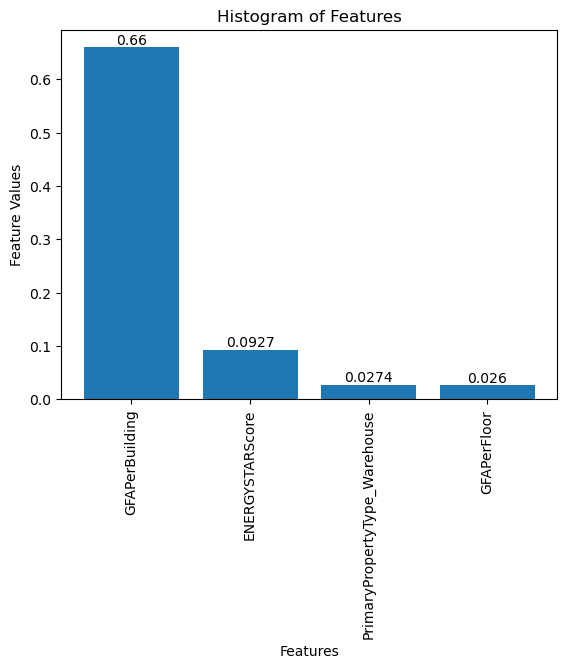

In [33]:
import matplotlib.pyplot as plt

# Feature names and values
feature_names = ["GFAPerBuilding", "ENERGYSTARScore", "PrimaryPropertyType_Warehouse", "GFAPerFloor"]
feature_values = [0.6600, 0.0927, 0.0274, 0.0260]

# Plot the histogram
plt.bar(feature_names, feature_values)
plt.title("Histogram of Features")
plt.xlabel("Features")
plt.ylabel("Feature Values")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add numbers on top of each feature bar
for i, val in enumerate(feature_values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom')

# Display the plot
plt.show()
